In [99]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


sns.set_palette("rocket_r")
sns.set_context('notebook',font_scale = 1.2)

import plotly.graph_objs as go
import plotly.express as px

In [100]:
# Reading Data

matches = pd.read_csv("IPL Data Set\matches.csv")
delivery = pd.read_csv("IPL Data Set\deliveries.csv")

In [101]:
pd.set_option("max_columns", None)

In [102]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [103]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [104]:
# Shape

print("Matches- ",matches.shape)
print("Deliveries - ",delivery.shape)

Matches-  (636, 18)
Deliveries -  (150460, 21)


In [105]:
# Info

matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [106]:
# Matches-Null values

matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [107]:
# Droping column umpire3 because it contain only null values

matches.drop("umpire3", axis=1, inplace=True)

In [108]:
# delivery info

delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [109]:
# Checking null values

delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [110]:
delivery.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
28754,124,2,Royal Challengers Bangalore,Deccan Chargers,17,4,V Kohli,KV Sharma,Harmeet Singh,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
102938,434,2,Kolkata Knight Riders,Mumbai Indians,13,1,EJG Morgan,DB Das,AN Ahmed,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
137624,582,1,Rising Pune Supergiants,Gujarat Lions,19,6,R Bhatia,MS Dhoni,RA Jadeja,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
134510,568,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,2,EJG Morgan,DA Warner,MA Starc,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
148780,630,1,Mumbai Indians,Gujarat Lions,3,4,RG Sharma,MJ Guptill,P Kumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [111]:
# filling missing value with 0

delivery.fillna(0, inplace=True)

In [112]:
# Checking the null values again

delivery.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [113]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [114]:
# Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala',
                 'Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [115]:
delivery.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [116]:
delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [117]:
print(" Total Matches Played", matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())
print(' \n Total venues played at:',matches['city'].nunique())
print(' \n Total umpires ',matches['umpire1'].nunique())

 Total Matches Played 636
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']
 
 Total venues played at: 30
 
 Total umpires  44


In [118]:
# remove the matched affected by rain

matches = matches[matches.dl_applied==0]

In [119]:
print(matches.player_of_match.value_counts().idxmax(), ": has most man of the match awards")
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle : has most man of the match awards
MI : has the highest number of match wins


In [120]:
# matches won by maximum runs

matches['win_by_runs'].max()

146

In [121]:
df = matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

In [122]:
df = matches.iloc[[matches["win_by_wickets"].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


Kolkata Knight Riders(KKR) defeated Gujrat Lions(GL) with the highest wins by wickets.

In [123]:
# Toss Decision

matches.toss_decision.value_counts(normalize=True)*100

field    56.935484
bat      43.064516
Name: toss_decision, dtype: float64

57% of the time team has choosed to do fielding.

# Toss Decisions across Seasons

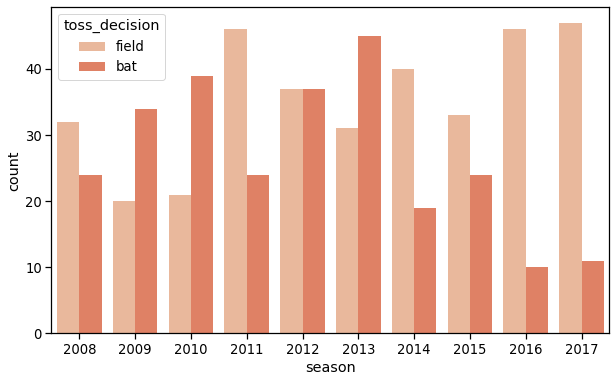

In [124]:
# Toss Decisions across Seasons

plt.figure(figsize=(10,6))
sns.countplot(matches.season, hue=matches.toss_decision)
plt.show()

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2016 though, the majority of toss winners opted for batting.

# Maximum Toss Winner Team

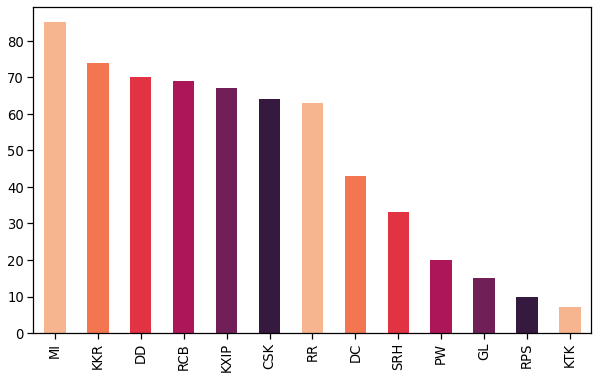

In [125]:
plt.figure(figsize=(10,6))
matches.toss_winner.value_counts().plot.bar(color=sns.color_palette('rocket_r'))
plt.show()

Mumbai Indians seem to be very lucky having the higest win in tosses follwed by Kolkata Knight Riders. Pune Supergiants have the lowest wins as they have played the lowest matches also. This does not show the higher chances of winning the toss as the number of matches played by each team is uneven.

# Total Matches vs Wins for Teams

In [126]:
matches_played_byteams = pd.concat([matches.team1,matches.team2])
matches_played_byteams = matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns = ["Teams","Total Matches"]
matches_played_byteams

,Teams,Total Matches
0,MI,157
1,RCB,149
2,DD,143
3,KXIP,143
4,KKR,141
5,CSK,127
6,RR,118
7,DC,75
8,SRH,71
9,PW,46


In [127]:
df_match_winner = matches.winner.value_counts().reset_index()
df_match_winner.columns = ["Teams","winner"]
df_match_winner

,Teams,winner
0,MI,92
1,CSK,77
2,KKR,73
3,RCB,70
4,KXIP,69
5,RR,63
6,DD,61
7,SRH,40
8,DC,29
9,GL,13


In [128]:
# mering both the data frames

df = pd.merge(matches_played_byteams, df_match_winner, on="Teams")
df.set_index("Teams",inplace=True)
df

,Total Matches,winner
Teams,,
MI,157,92
RCB,149,70
DD,143,61
KXIP,143,69
KKR,141,73
CSK,127,77
RR,118,63
DC,75,29
SRH,71,40


# Stacked bar chart for total matches and matches won

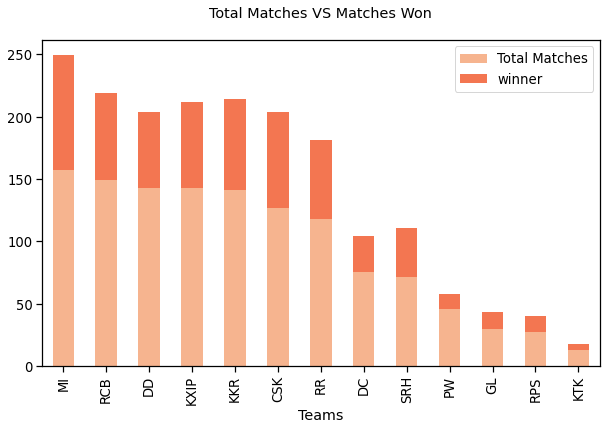

In [129]:
df.plot(kind='bar', stacked=True,color=sns.color_palette('rocket_r'),figsize=(10,6))
plt.title("Total Matches VS Matches Won\n")
plt.show()

In [130]:
matches.shape

(620, 17)

# Is Toss Winner Also the Match Winner?

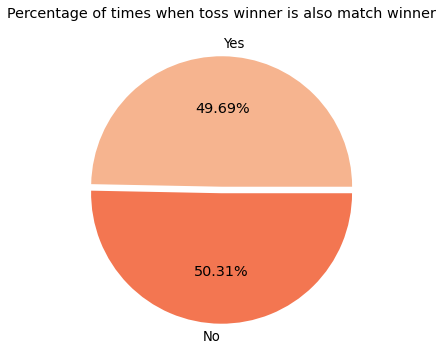

In [131]:
plt.figure(figsize=[10,6])
df = matches[matches.toss_winner==matches.winner]
slices=[len(df),(636-len(df))]
labels = ["Yes","No"]
plt.pie(slices, labels=labels, autopct="%.2f%%", explode=(0,0.05))
plt.title("Percentage of times when toss winner is also match winner")
plt.show()

Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winning team is about 50%-50%

# Matches played across each season

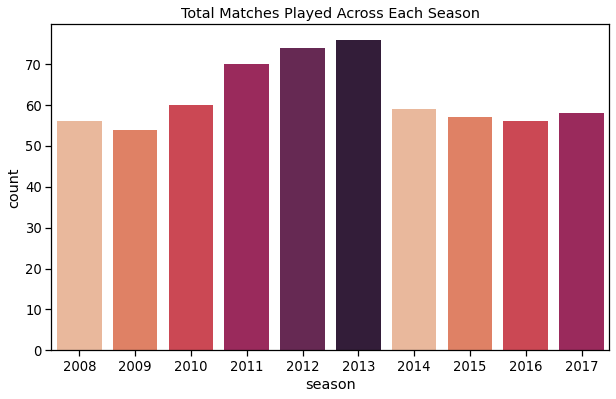

In [132]:
plt.figure(figsize=(10,6))
sns.countplot(matches.season, palette=sns.color_palette('rocket_r'))
plt.title("Total Matches Played Across Each Season")
plt.show()

# Runs Across the Seasons

In [133]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


In [134]:
df = batsmen.groupby("season")["total_runs"].sum().reset_index()
df.head(2)

,season,total_runs
0,2008,17521
1,2009,15595


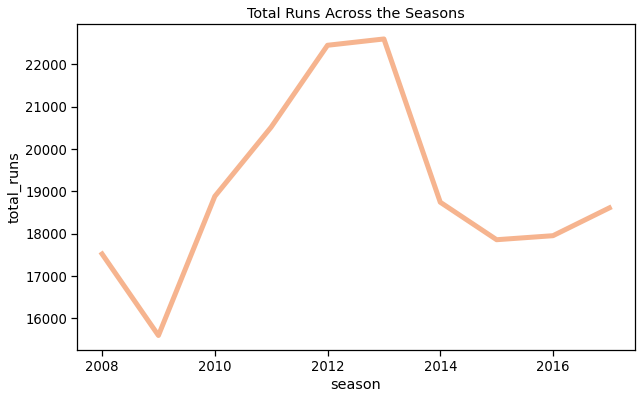

In [135]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.season, y=df.total_runs,linewidth=5)
plt.title("Total Runs Across the Seasons")
plt.show()

There was a decline in total runs from 2008 to 2009.But there after there was a substantial increase in runs in every season until 2013, but from next season there was a slump in the total runs. But the number of matches are not equal in all seasons. We should check the average runs per match in each season

# Average runs per match in each Season

In [136]:
# Average runs per match in each Season

avgruns_each_season=matches.groupby(['season'])["id"].count().reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)

# Merging df and avgruns_each_season

avgruns_each_season = pd.merge(avgruns_each_season, df, on="season")

# adding new column to calculate the average run
avgruns_each_season["average_runs_per_match"] = avgruns_each_season["total_runs"]/avgruns_each_season["matches"]
avgruns_each_season

,season,matches,total_runs,average_runs_per_match
0,2008,56,17521,312.875000
1,2009,54,15595,288.796296
2,2010,60,18883,314.716667
3,2011,70,20519,293.128571
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,59,18744,317.694915
7,2015,57,17858,313.298246
8,2016,56,17953,320.589286
9,2017,58,18610,320.862069


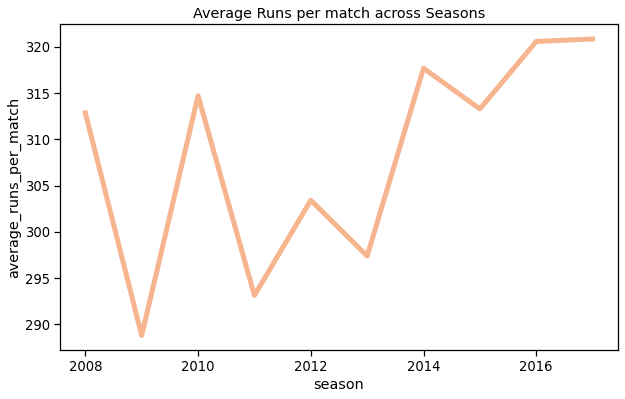

In [137]:
# Ploting the above

plt.figure(figsize=(10,6))
sns.lineplot(x=avgruns_each_season.season, y=avgruns_each_season.average_runs_per_match, linewidth=5)
plt.title("Average Runs per match across Seasons")
plt.show()

# Total 6's and 4's per season

In [138]:
df_six_four = batsmen.groupby(["season","batsman_runs"])["total_runs"].count().reset_index()
df_six = df_six_four[(df_six_four.batsman_runs==6)]
df_six

,season,batsman_runs,total_runs
6,2008,6,606
13,2009,6,471
20,2010,6,587
27,2011,6,622
34,2012,6,733
41,2013,6,681
48,2014,6,708
55,2015,6,668
62,2016,6,606
69,2017,6,698


In [139]:
df_four = df_six_four[(df_six_four.batsman_runs==4)]
df_four

,season,batsman_runs,total_runs
4,2008,4,1666
11,2009,4,1261
18,2010,4,1709
25,2011,4,1856
32,2012,4,1911
39,2013,4,2054
46,2014,4,1551
53,2015,4,1572
60,2016,4,1551
67,2017,4,1601


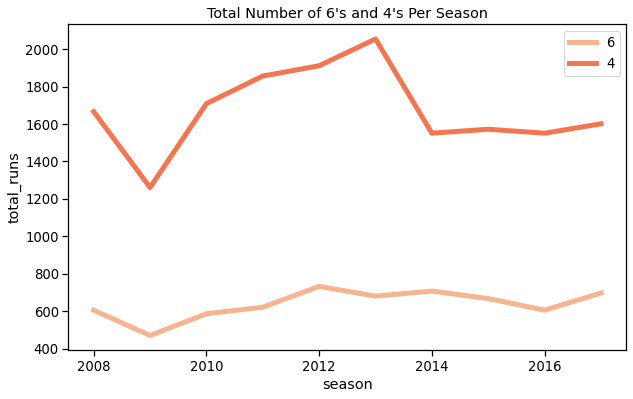

In [140]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df_six.season, y=df_six.total_runs, linewidth=5)
sns.lineplot(x=df_four.season, y=df_four.total_runs, linewidth=5)

plt.legend(["6","4"])
plt.title("Total Number of 6's and 4's Per Season")

plt.show()

# Favorite Grounds

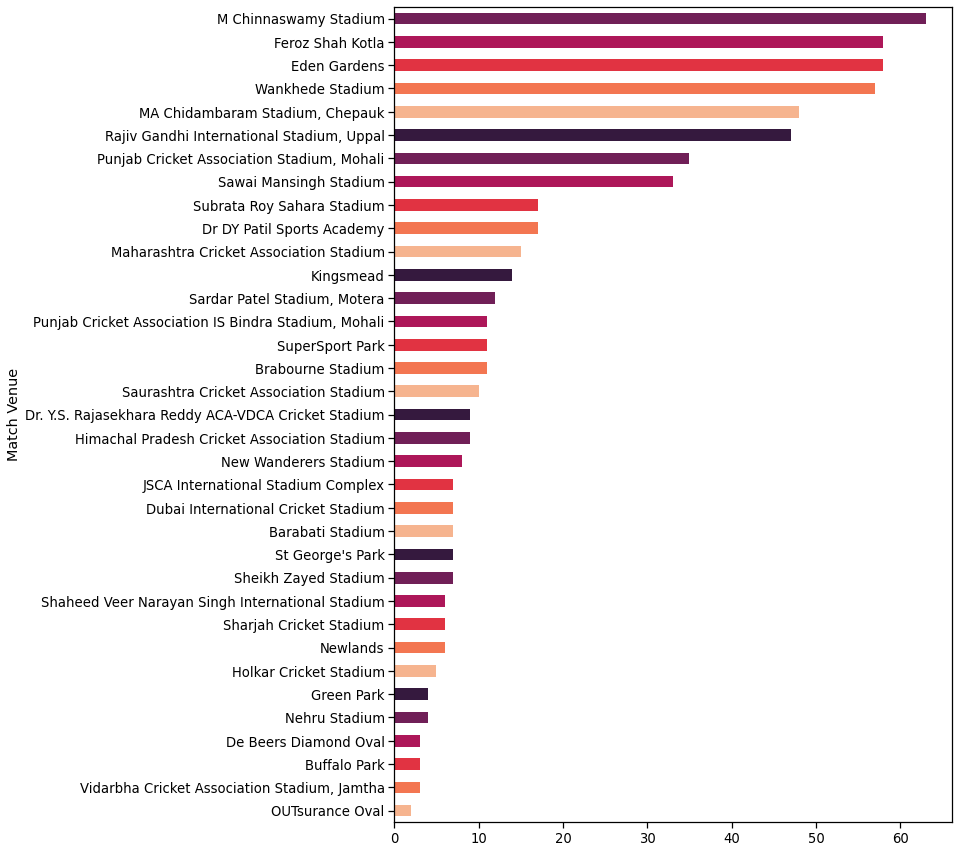

In [141]:
plt.subplots(figsize=(10,15))
matches.venue.value_counts(ascending=True).plot.barh(color=sns.color_palette('rocket_r'))
plt.ylabel("Match Venue")
plt.show()

# Maximum Man Of Matches

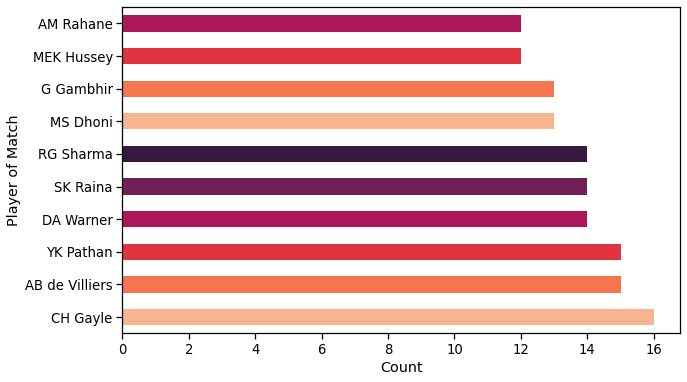

In [142]:
plt.subplots(figsize=(10,6))
matches.player_of_match.value_counts(ascending=False).head(10).plot.barh(color=sns.color_palette('rocket_r'))
plt.ylabel("Player of Match")
plt.xlabel("Count")
plt.show()

# Favorite Umpires

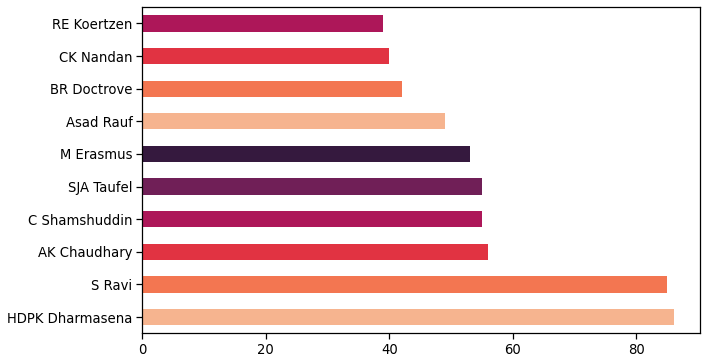

In [143]:
plt.subplots(figsize=(10,6))
ump = pd.concat([matches.umpire1, matches.umpire2])
ump.value_counts().head(10).plot.barh(color=sns.color_palette('rocket_r'))
plt.show()

# 200+ Score

In [144]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe

high_scores=high_scores[high_scores['total_runs']>=200]

#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


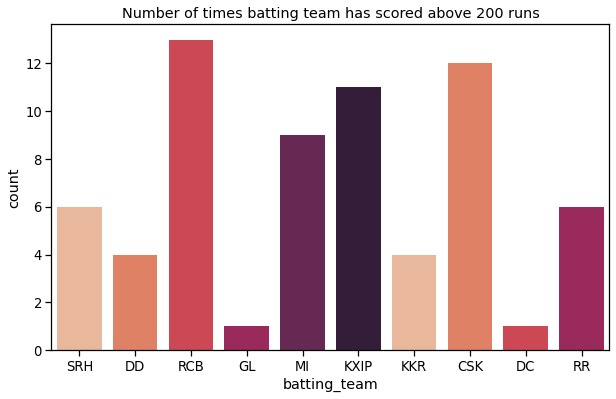

In [145]:
plt.figure(figsize=(10,6))
sns.countplot(high_scores.batting_team, palette=sns.color_palette('rocket_r'))
plt.title("Number of times batting team has scored above 200 runs")
plt.show()

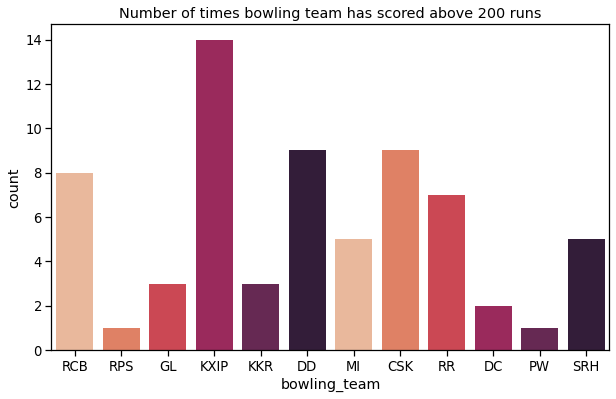

In [146]:
plt.figure(figsize=(10,6))
sns.countplot(high_scores.bowling_team, palette=sns.color_palette('rocket_r'))
plt.title("Number of times bowling team has scored above 200 runs")
plt.show()

# Target Achieved/Not Achieved per Match

In [147]:
inning_wise = delivery.groupby(["match_id","inning","batting_team","bowling_team"])["total_runs"].sum().reset_index()
inning_1 = inning_wise[inning_wise.inning==1]
inning_2 = inning_wise[inning_wise.inning==2]
inning_1 = inning_1.merge(inning_2[["match_id","inning","total_runs"]],on="match_id")

inning_1.rename(columns={"inning_x":"inning_1","inning_y":"inning_2","total_runs_x":"inning1_runs","total_runs_y":"inning2_runs"},
               inplace=True)

inning_1["is_score_chased"] = np.where(inning_1.inning1_runs<=inning_1.inning2_runs,"Yes","No")
inning_1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,No
1,2,1,MI,RPS,184,2,187,Yes
2,3,1,GL,KKR,183,2,184,Yes
3,4,1,RPS,KXIP,163,2,164,Yes
4,5,1,RCB,DD,157,2,142,No


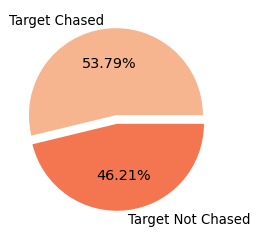

In [148]:
# Perentage of time the target was chased

plt.pie(inning_1.is_score_chased.value_counts(),explode=[0,0.1], autopct="%.2f%%",labels=["Target Chased","Target Not Chased"])
plt.show()

In [149]:
# Checking the probability of target for 200+ score

inning_1 = inning_1[inning_1.inning1_runs>=200]
inning_1["is_score_chased"] = np.where(inning_1.inning1_runs<=inning_1.inning2_runs,"Yes","No")
inning_1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,No
8,9,1,DD,RPS,205,2,108,No
19,20,1,RCB,GL,213,2,192,No
31,32,1,SRH,KXIP,207,2,181,No
35,36,1,SRH,KKR,209,2,161,No


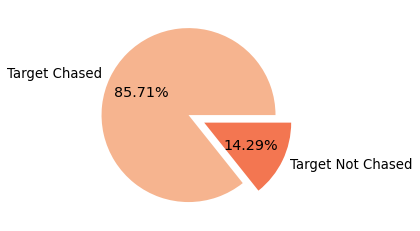

In [150]:
plt.pie(inning_1.is_score_chased.value_counts(),explode=[0,0.2], autopct="%.2f%%",labels=["Target Chased","Target Not Chased"])
plt.show()

From the above graph,it is clear that team batting first and scoring 200+ runs, has a very high probablity of winning tshe match.

# Batsman Comparator

In [151]:
balls = delivery.groupby(["batsman","batting_team"]).agg({"ball":pd.Series.count, "batsman_runs":np.sum}).reset_index()

sixes = delivery.groupby(["batsman","batting_team"])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
sixes.columns = ["batsman","batting_team","6's"]

fours=delivery.groupby(["batsman","batting_team"])['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours.columns = ["batsman","batting_team","4's"]

balls["6's"] = sixes["6's"]
balls["4's"] = fours["4's"]

balls["strike_rate"] = balls["batsman_runs"]/balls["ball"]*100
balls.head()

,batsman,batting_team,ball,batsman_runs,6's,4's,strike_rate
0,A Ashish Reddy,DC,30,35,1,3,116.666667
1,A Ashish Reddy,SRH,166,245,14,13,147.590361
2,A Chandila,RR,7,4,0,0,57.142857
3,A Chopra,KKR,75,53,0,7,70.666667
4,A Choudhary,RCB,20,25,1,1,125.000000


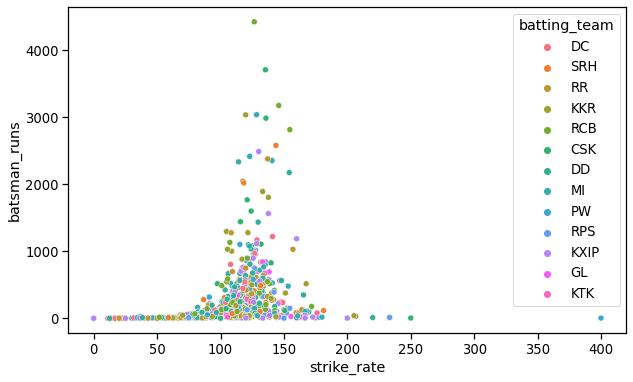

In [152]:
plt.figure(figsize=(10,6))
sns.scatterplot(balls.strike_rate,balls.batsman_runs,hue=balls.batting_team)
plt.show()

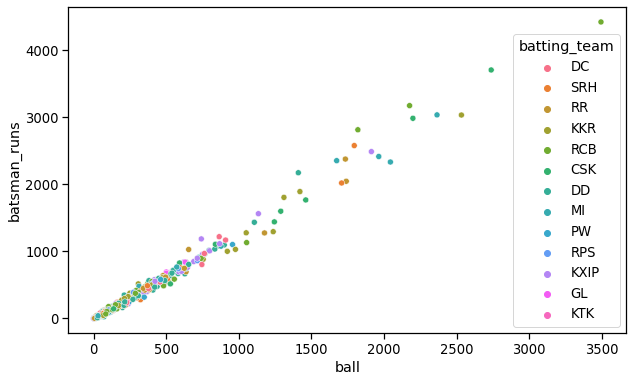

In [153]:
plt.figure(figsize=(10,6))
sns.scatterplot(balls.ball,balls.batsman_runs,hue=balls.batting_team)
plt.show()

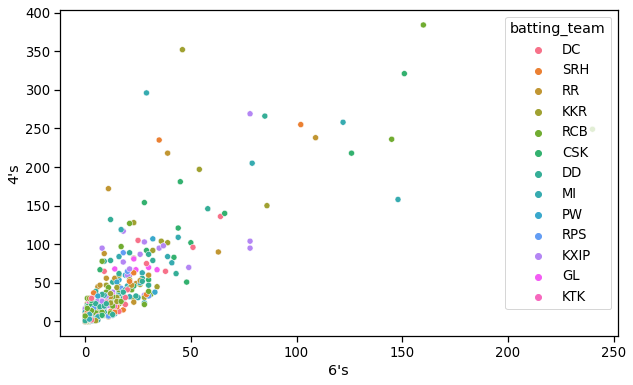

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(balls["6's"],balls["4's"],hue=balls.batting_team)
plt.show()

# Top 10 Batsman

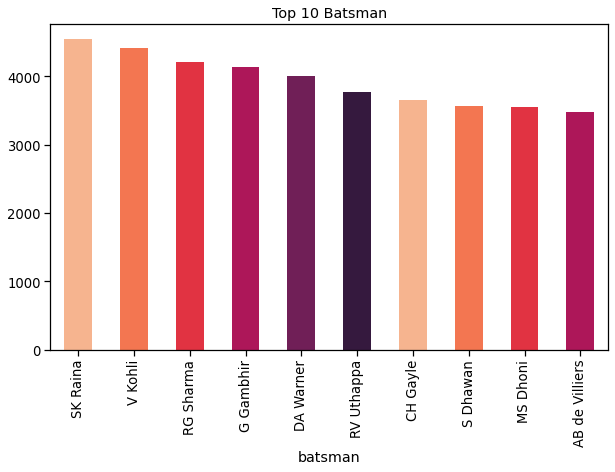

In [155]:
top10 = delivery.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)
top10[:10].plot.bar(figsize=(10,6),color=sns.color_palette('rocket_r'))
plt.title("Top 10 Batsman")
plt.show()

# Top Batsman's with 1's, 2's, 3's, 4's, 6's

In [156]:
toppers = delivery.groupby(["batsman","batsman_runs"])["total_runs"].count().reset_index()
toppers = toppers.pivot('batsman','batsman_runs','total_runs')
toppers.head()

batsman_runs,0,1,2,3,4,5,6
batsman,,,,,,,
A Ashish Reddy,61.0,83.0,20.0,1.0,16.0,NaN,15.0
A Chandila,3.0,4.0,NaN,NaN,NaN,NaN,NaN
A Chopra,45.0,21.0,2.0,NaN,7.0,NaN,NaN
A Choudhary,4.0,13.0,1.0,NaN,1.0,NaN,1.0
A Flintoff,24.0,23.0,2.0,1.0,5.0,NaN,2.0


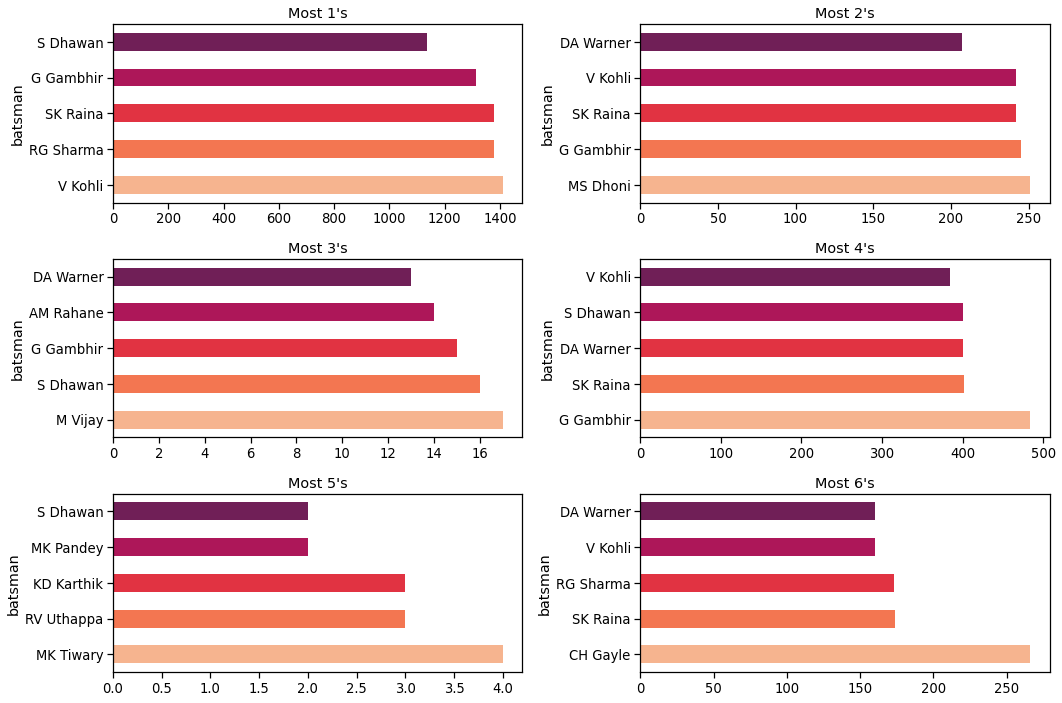

In [157]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
toppers[1].sort_values(ascending=False)[:5].plot(kind="barh",color=sns.color_palette('rocket_r'))
plt.title("Most 1's")

plt.subplot(3,2,2)
toppers[2].sort_values(ascending=False)[:5].plot(kind="barh",color=sns.color_palette('rocket_r'))
plt.title("Most 2's")

plt.subplot(3,2,3)
toppers[3].sort_values(ascending=False)[:5].plot(kind="barh",color=sns.color_palette('rocket_r'))
plt.title("Most 3's")

plt.subplot(3,2,4)
toppers[4].sort_values(ascending=False)[:5].plot(kind="barh",color=sns.color_palette('rocket_r'))
plt.title("Most 4's")

plt.subplot(3,2,5)
toppers[5].sort_values(ascending=False)[:5].plot(kind="barh",color=sns.color_palette('rocket_r'))
plt.title("Most 5's")

plt.subplot(3,2,6)
toppers[6].sort_values(ascending=False)[:5].plot(kind="barh",color=sns.color_palette('rocket_r'))
plt.title("Most 6's")

plt.tight_layout()
plt.show()

#### Inference

- Kohli has scored the maximum 1's
- Dhoni has the maximum 2's . Those Strong Legs :p
- Gambhir has the maximum 4's.
- C Gayle has the maximum 6's and he leads by a big margin.

# Top Individual Score

In [158]:
top_score = delivery.groupby(["match_id","batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_score = top_score.sort_values(by="batsman_runs",ascending=False)
top_score.head()

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128


Not only CH Gayle but there are many RCB players on the top scores list.

# Runs Scored By Batsman Across Seasons

In [159]:
batsmen.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


In [160]:
temp = batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
temp = temp.sort_values(by="batsman_runs",ascending=False)

temp = temp.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
temp['Total']=temp.sum(axis=1)
temp = temp.sort_values(by="Total", ascending=False)[:5]
temp = temp.drop("Total", axis=1)
temp

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
batsman,,,,,,,,,,
SK Raina,421.0,402.0,528.0,384.0,441.0,548.0,523.0,374.0,399.0,442.0
V Kohli,165.0,246.0,307.0,542.0,364.0,639.0,359.0,461.0,860.0,308.0
RG Sharma,404.0,362.0,404.0,372.0,433.0,538.0,390.0,482.0,489.0,333.0
G Gambhir,494.0,271.0,277.0,355.0,590.0,406.0,335.0,323.0,501.0,466.0
DA Warner,NaN,163.0,282.0,324.0,256.0,410.0,516.0,419.0,848.0,604.0


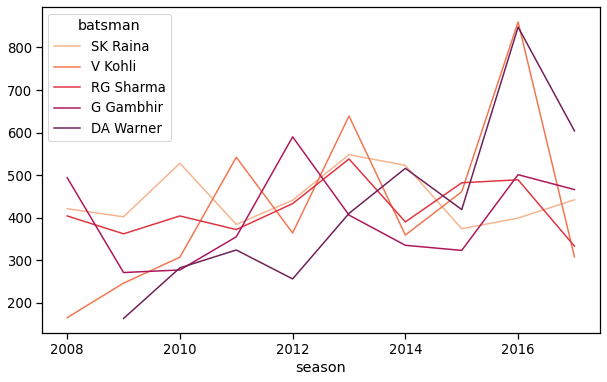

In [161]:
temp.T.plot(figsize=(10,6))
plt.show()

David Warner's form looks to be improving season by season. There has been a sharp decline in Kohli's Runs in the last season.

# Frequency of Scores

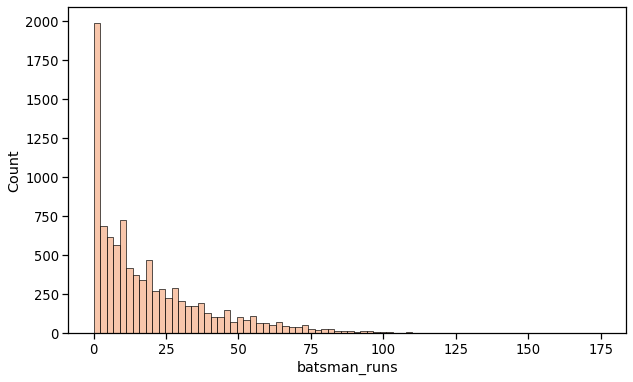

In [162]:
plt.figure(figsize=(10,6))
sns.histplot(top_score.batsman_runs)
plt.show()

The average score for a batsman is around 19-20. Also the number of single digit score is quite high and the number of centuries is low.

# Orange Cap Holders

In [163]:
orange_cap = batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values(by="batsman_runs", ascending=False)
orange_cap = orange_cap.drop_duplicates(subset=["season"],keep="first")
orange_cap = orange_cap.sort_values(by="season")
orange_cap

,season,batsman,batsman_runs
115,2008,SE Marsh,614
166,2009,AC Gilchrist,495
445,2010,SR Tendulkar,618
501,2011,CH Gayle,570
683,2012,CH Gayle,733
909,2013,MEK Hussey,733
1087,2014,RV Uthappa,660
1129,2015,AM Rahane,540
1382,2016,V Kohli,860
1420,2017,DA Warner,604


In [164]:
fig = px.bar(orange_cap, x="season", y="batsman_runs", color="batsman", title="Orange-Cap Holders")

fig.show()

# Top Bowlers

## Highest Wicket Taker

In [165]:
delivery.dismissal_kind.value_counts()

0                        143022
caught                     4373
bowled                     1382
run out                     755
lbw                         455
stumped                     243
caught and bowled           211
hit wicket                    9
retired hurt                  9
obstructing the field         1
Name: dismissal_kind, dtype: int64

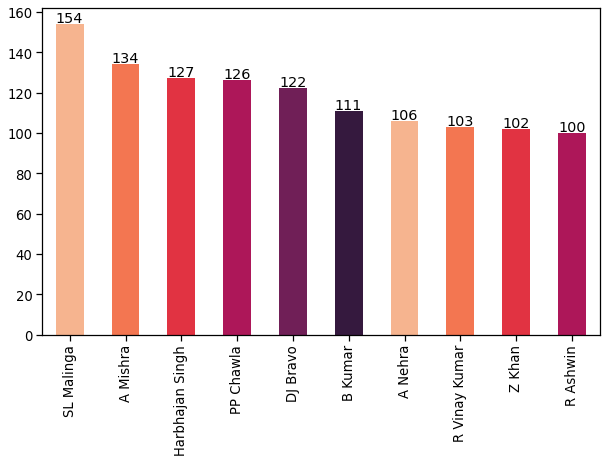

In [166]:
top_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"] 
                #considering these only because rest dimmisal kinds are not credited to bowlers.

temp = delivery[delivery.dismissal_kind.isin(top_bowler)]
ax = temp.bowler.value_counts()[:10].plot.bar(figsize=(10,6),color=sns.color_palette('rocket_r'))

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()+1.00))
                
plt.show()

SL Malinga leads the chart. Other bowlers have a very small wicket margin between them.

## Maximum Overs

In [167]:
temp = delivery.groupby(["bowler"]).count().sort_values(by="ball",ascending=False)[:10]
temp["total_overs"] = (temp.ball//6)

# temp.style.applymap("background-color: red" if x>300 else "background-color: white")
temp.total_overs.reset_index()

,bowler,total_overs
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432
5,R Ashwin,393
6,Z Khan,379
7,R Vinay Kumar,360
8,DW Steyn,359
9,IK Pathan,352


# Most Wickets by an IPL Team

In [168]:
lst = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
temp = delivery[delivery.dismissal_kind.isin(lst)]
temp.groupby("batting_team")["dismissal_kind"].count().sort_values(ascending=False)

batting_team
MI      839
KXIP    820
DD      794
RCB     788
KKR     740
CSK     617
RR      612
DC      434
SRH     376
PW      267
GL      171
RPS     140
KTK      75
Name: dismissal_kind, dtype: int64

# Most No Balls By an IPL Team

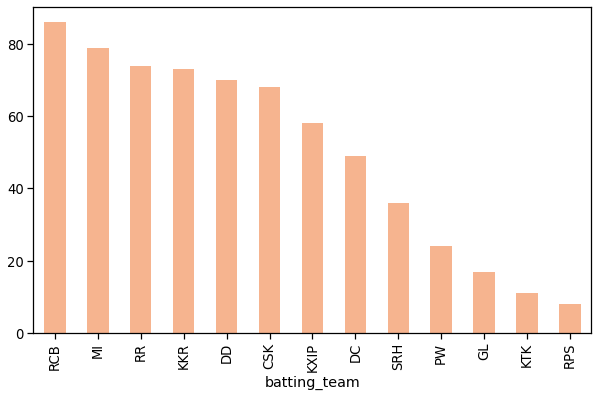

In [169]:
plt.figure(figsize=(10,6))
delivery.groupby(['batting_team'])['noball_runs'].sum().sort_values(ascending=False).plot.bar()
plt.show()

# Most Extra Runs Given By Team

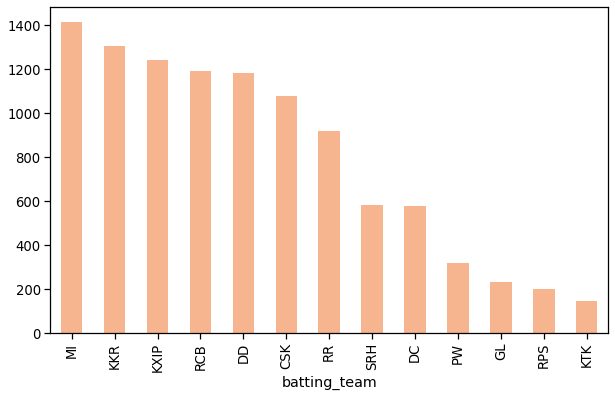

In [170]:
plt.figure(figsize=(10,6))
delivery.groupby(['batting_team'])['extra_runs'].sum().sort_values(ascending=False).plot.bar()
plt.show()

# Most Wide Runs Given By Team

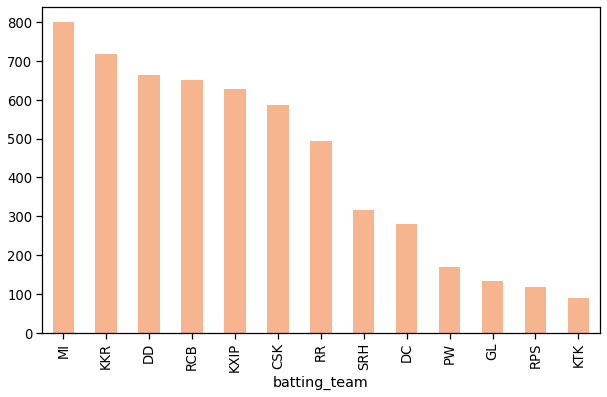

In [171]:
plt.figure(figsize=(10,6))
delivery.groupby(['batting_team'])['wide_runs'].sum().sort_values(ascending=False).plot.bar()
plt.show()

## Top 20 Bowlers

In [172]:
temp = delivery.groupby("bowler").agg({"total_runs":np.sum,"bowler":pd.Series.count})
temp.columns = ["Run_Given","Total_Balls"]
temp["Total_over"] = (temp.Total_Balls//6)
temp = temp.reset_index()

dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
a = delivery[delivery.dismissal_kind.isin(dismissal_kinds)].bowler.value_counts().reset_index()

temp = temp.merge(a, left_on="bowler",right_on="index",how="left",)
temp = temp[['bowler_x', 'Run_Given', 'Total_Balls', 'Total_over','bowler_y']]
temp.columns = ["bowler","run_given","total_balls","total_over","wickets_taken"]
temp = temp.sort_values("wickets_taken", ascending=False)[:20]
temp

,bowler,run_given,total_balls,total_over,wickets_taken
294,SL Malinga,3034,2694,449,154.0
5,A Mishra,3305,2703,450,134.0
117,Harbhajan Singh,3453,2989,498,127.0
229,PP Chawla,3315,2594,432,126.0
88,DJ Bravo,2815,2110,351,122.0
50,B Kumar,2410,2054,342,111.0
7,A Nehra,2537,1974,329,106.0
244,R Vinay Kumar,2976,2161,360,103.0
355,Z Khan,2860,2276,379,102.0
234,R Ashwin,2552,2359,393,100.0


In [173]:
# plotly Graph

fig = px.scatter(data_frame=temp, x="bowler",y="total_over",size=temp.wickets_taken,hover_data=["run_given","total_balls"])
fig.show()

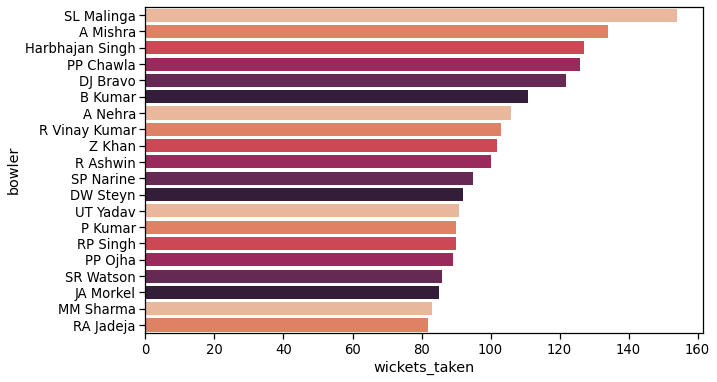

In [174]:
# Bar Graph (above plot)

plt.figure(figsize=(10,6))
sns.barplot(temp.wickets_taken,temp.bowler,palette=sns.color_palette('rocket_r'))
  
plt.show()

# Purple Cap Holder

In [175]:
dismissal_kinds = ["bowled", "caught", "caught and bowled", "hit wicket", "lbw", "stumped"]

purple = batsmen[batsmen.dismissal_kind.isin(dismissal_kinds)]
purple = purple.groupby(["season","bowler"])["dismissal_kind"].count().reset_index().sort_values(by="dismissal_kind", ascending=False)
purple = purple.drop_duplicates(subset=["season"], keep="first").sort_values(by="season")

purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

purple

,season,bowler,count_wickets
75,2008,Sohail Tanvir,22
152,2009,RP Singh,23
239,2010,PP Ojha,21
365,2011,SL Malinga,28
435,2012,M Morkel,25
507,2013,DJ Bravo,32
637,2014,MM Sharma,23
693,2015,DJ Bravo,26
772,2016,B Kumar,22
859,2017,B Kumar,25


In [176]:
fig = px.bar(data_frame=purple, x="season", y="count_wickets", text="bowler",title="Purple Cup Holder")
fig.show()

## Most Dot Ball by a Bowler

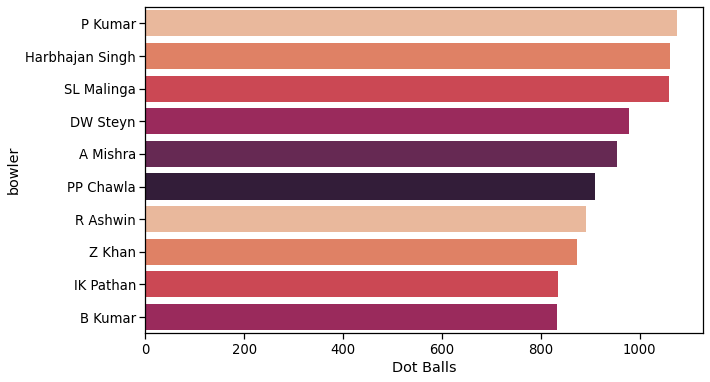

In [177]:
plt.figure(figsize=(10,6))
temp = delivery[delivery.total_runs==0].groupby("bowler")["match_id"].count().sort_values(ascending=False)[:10]
sns.barplot(y=temp.index, x=temp,palette=sns.color_palette('rocket_r'))
plt.xlabel("Dot Balls")
plt.show()

# Teams which have played and won the maximum finals

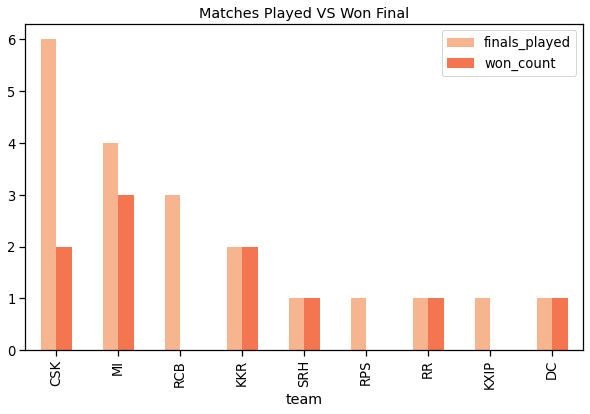

In [178]:
finals = matches.drop_duplicates(subset=['season'],keep='last') # We have to consider only the winner,removing the rest.

finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(figsize=(10,6))

plt.title("Matches Played VS Won Final")
plt.show()

Wooh!! CSK has played 6 IPL finals(but could win only 2. followed by MI with 3. CSK,MI,KKR have all won 2 titles each. Sadly RCB have never won a final even with 3 apperances.

# Do Toss Winners Win Finals??

In [179]:
finals = matches.drop_duplicates(subset=['season'],keep='last')
finals = finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
finals

,id,season,city,team1,team2,toss_winner,toss_decision,winner
58,59,2017,Hyderabad,MI,RPS,MI,bat,MI
116,117,2008,Mumbai,CSK,RR,RR,field,RR
173,174,2009,Johannesburg,DC,RCB,RCB,field,DC
233,234,2010,Mumbai,CSK,MI,CSK,bat,CSK
306,307,2011,Chennai,CSK,RCB,CSK,bat,CSK
380,381,2012,Chennai,CSK,KKR,CSK,bat,KKR
456,457,2013,Kolkata,MI,CSK,MI,bat,MI
516,517,2014,Bangalore,KXIP,KKR,KKR,field,KKR
575,576,2015,Kolkata,MI,CSK,CSK,field,MI
635,636,2016,Bangalore,SRH,RCB,SRH,bat,SRH


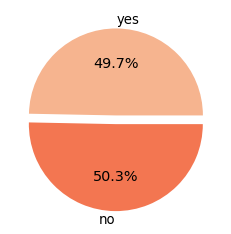

In [180]:
temp = finals[finals['toss_winner']==finals['winner']]

slice = [len(finals),(10-len(temp))]
labels=['yes','no']

plt.pie(slices,labels=labels,explode=(0,0.1),autopct='%1.1f%%')
plt.show()

83.3%!!! chances is that the toss winning team wins the title. Thats a huge number and thus indication that winning the toss plays a great role in match winning!

# Batting Or Fielding For Toss Winners

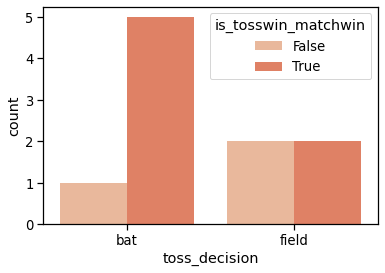

In [181]:
finals["is_tosswin_matchwin"] = finals['toss_winner']==finals['winner']

sns.countplot(data=finals, x="toss_decision",hue="is_tosswin_matchwin")
plt.show()

Looks like after Winning The Toss team should opt for Batting as we can see that batting has proved to be match winning decision for 4/5 times out of 10 finals.

# END